## Dates and Times in Python

### Dates

- Python has a special class - 'date' to handle dates

#### Why do we need a date class?
- 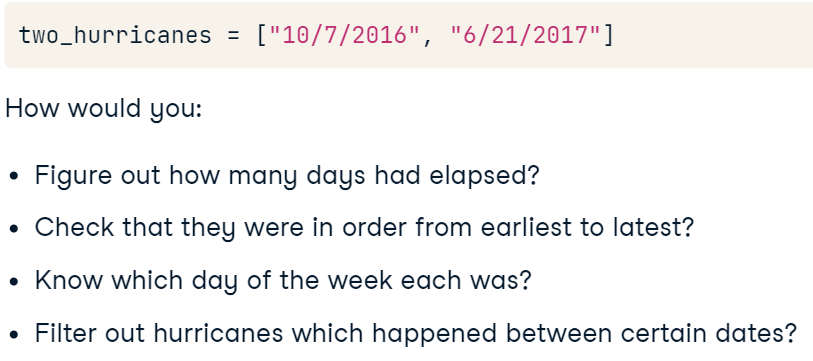


In [9]:
import pandas as pd
import pickle
with open('Datasets/florida_hurricane_dates.pkl', 'rb') as file:
    data = pickle.load(file)
florida_huricane_dates = pd.DataFrame(data)
florida_huricane_dates


,0
0,1988-08-04
1,1990-10-12
2,2003-04-20
3,1971-09-01
4,1988-08-23
...,...
230,1985-08-15
231,2016-06-06
232,2006-08-30
233,1980-11-18


In [15]:
# Creating Date Objects

# Import date
from datetime import date
# Create dates
# Syntax of date function: date(YYYY, MM, DD)
two_huricane_dates = [date(2016, 10, 7), date(2017, 6, 21)]
print("Year: ", two_huricane_dates[0].year)
print("Month: ", two_huricane_dates[0].month)
print("Day: ", two_huricane_dates[0].day)
# 0 = Monday, 1 = Tuesday, ...6 = Sunday
print("Weekday: ", two_huricane_dates[0].weekday()) 

Year:  2016
Month:  10
Day:  7
Weekday:  4


### Math with Dates

In [19]:
# Math with Dates

# Creating dates
d1 = date(2017, 11, 5)
d2 = date(2017, 12, 4)
list = [d1, d2]

# Minimum of dates
print(min(list))

# Subtracting dates
delta = d2 - d1
print(delta)
print(delta.days)

2017-11-05
29 days, 0:00:00
29


In [20]:
# Import timedelta
from datetime import timedelta

# Create a 29 day time delta
td = timedelta(days=29)
print(d1 + td)

2017-12-04


### Turning Daets back into Strings

- ISO 8601 Format: YYYY-MM-DD
- ISO 8601 dates sort correctly

In [22]:
# Example Date
d = date(2017 , 11, 5)

# ISO FORMAT: YYYY-MM-DD
print(d)
# Express the date in ISO 8601 format and put it in a list
print([d.isoformat()])

2017-11-05
['2017-11-05']


In [26]:
# strftime method

print(d.strftime("%Y"))
print(d.strftime("Year is %Y"))
print(d.strftime("%Y/%m/%d"))

2017
Year is 2017
2017/11/05


# Time
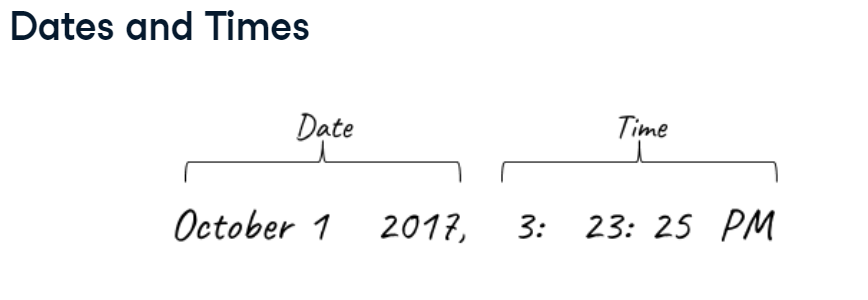
- Time is stored in a 24hr format

In [31]:
# Time

from datetime import datetime
dt = datetime(2017, 10, 1, 15, 23, 25)
dt = datetime(2017, 10, 1, 15, 23, 25, 500000)
print(dt)

# Updating datetime values
dt_hr = dt.replace(minute = 0)
print(dt_hr)

2017-10-01 15:23:25.500000
2017-10-01 15:00:25.500000


In [ ]:
# Importing the dataset


In [34]:
# Create datetime
dt = datetime(2017, 12, 30, 15, 19, 13)
print(dt.strftime("%Y-%m-%d"))
print(dt.strftime("%Y-%m-%d %H:%M:%S"))
print(dt.strftime("%Y-%m-%d on %H:%M:%S"))
# ISO 8601 Format for datetime

print(dt.isoformat())


2017-12-30
2017-12-30 15:19:13
2017-12-30 on 15:19:13
2017-12-30T15:19:13


In [37]:
# Parsing datetimes from strings

from datetime import datetime
# strptime is short for String Parse Time
# Syntax: dt = datetime.strptime("String_to_convert_into_datetime", "Format_String") 
dt = datetime.strptime("12/30/2017 15:19:13", "%m/%d/%Y %H:%M:%S")
print(type(dt))
print(dt)

<class 'datetime.datetime'>
2017-12-30 15:19:13


### UNIX Timestamp

- Many computers store the time as the number of seconds since 1st Jan, 1970 as this date is largely considered the birth of modern day computers


In [38]:
# A Timestamp
ts = 1514665153.0
# Convert to datetime and print
print(datetime.fromtimestamp(ts))

2017-12-31 01:49:13


### Working with durations

In [47]:
# Working with durations
start = datetime(2017, 10, 8, 23, 46, 47)
end = datetime(2017, 10, 9, 0, 10, 57)

# Subtract datetimes to get a timedelta
duration = end - start
# Getting the number of seconds a timedelta represents
print("number of seconds a timedelta: ", duration.total_seconds())
print("\n")

# Create a timedelta
from datetime import timedelta
delta1 = timedelta(seconds = 1)
print(start)
print(start+delta1)
print("\n")

delta2 = timedelta(days = 1, seconds = 1)
print(start)
# One day and one second later
print(start + delta2)
print("\n")

# Timedeltas can be negative
delta3 = timedelta(weeks = -1)
print(start)
print(start + delta3)



number of seconds a timedelta:  1450.0


2017-10-08 23:46:47
2017-10-08 23:46:48


2017-10-08 23:46:47
2017-10-09 23:46:48


2017-10-08 23:46:47
2017-10-01 23:46:47


# UTC Offsets
- Uptill now, all datetime objects were naive as they had no timezone associated with them

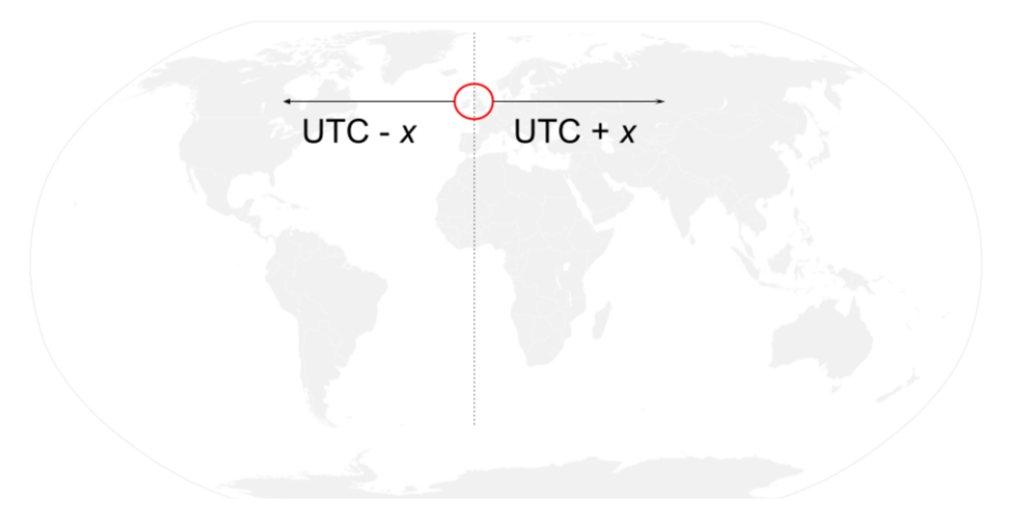

In [49]:
from datetime import datetime, timedelta, timezone
# US Eastern Standard Timezone
ET = timezone(timedelta(hours=-5))
# Timezone aware datetime
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo=ET)
print(dt)

# India Standarad Time
IST = timezone(timedelta(hours = 5, minutes = 30))
# Convert to IST
print(dt.astimezone(IST))

2017-12-30 15:09:03-05:00
2017-12-31 01:39:03+05:30


In [50]:
# Adjusting TImezone vs Changing tzinfo
print(dt.replace(tzinfo=timezone.utc))

# OR

# Change orignal to match UTC
print(dt.astimezone(timezone.utc))

2017-12-30 15:09:03+00:00
2017-12-30 20:09:03+00:00


# Time zone Database

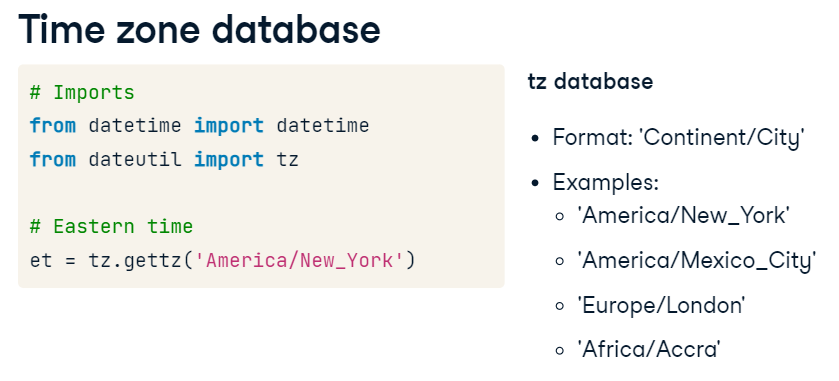

In [51]:
# Imports
from datetime import datetime
from dateutil import tz

# Eastern Time
et = tz.gettz('America/New_York')

# Last Ride
last = datetime(2017, 12, 30, 15, 9, 3, tzinfo = et)
print(last)


2017-12-30 15:09:03-05:00


# Starting Daylight Saving Time

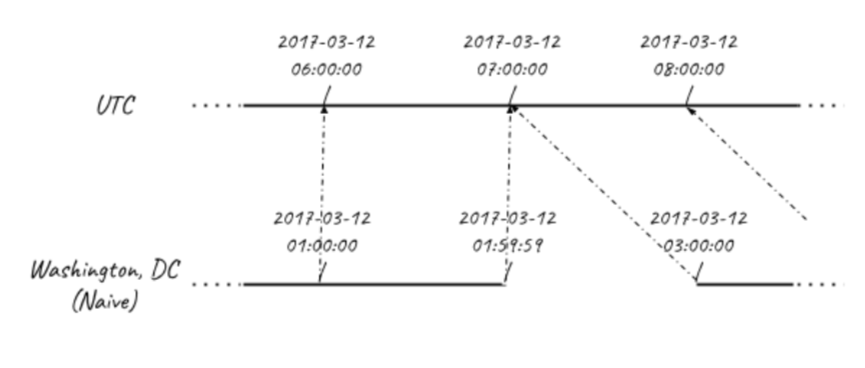

In [54]:
# Starting Daylight Saving Time

spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
print(spring_ahead_159am.isoformat())

spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
print(spring_ahead_3am.isoformat())

(spring_ahead_3am - spring_ahead_159am).total_seconds()


2017-03-12T01:59:59
2017-03-12T03:00:00


3601.0

In [57]:
# Creating Timezone objects

EST = timezone(timedelta(hours = -5))
EDT = timezone(timedelta(hours = -4))

spring_ahead_159am = spring_ahead_159am.replace(tzinfo = EST)
print(spring_ahead_159am.isoformat())

spring_ahead_3am = spring_ahead_3am.replace(tzinfo = EDT)
print(spring_ahead_3am.isoformat())

(spring_ahead_3am - spring_ahead_159am).seconds

2017-03-12T01:59:59-05:00
2017-03-12T03:00:00-04:00


1

In [ ]:
# How to identify when the daylight saving time cutoff is?

# import tz
from dateutil import tz

# Create Eastern Timezone
eastern  = tz.gettz('America/New_York')

# 2017-03-12 01:59:59 in Easter Time(EST)
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59, tzinfo = eastern)


# 2017-03-12 03:00:00 in Easter Time(EDT)
spring_ahead_159am = datetime(2017, 3, 12, 3, 0, 0, tzinfo = eastern)

# Ending Daylight Saving Time

 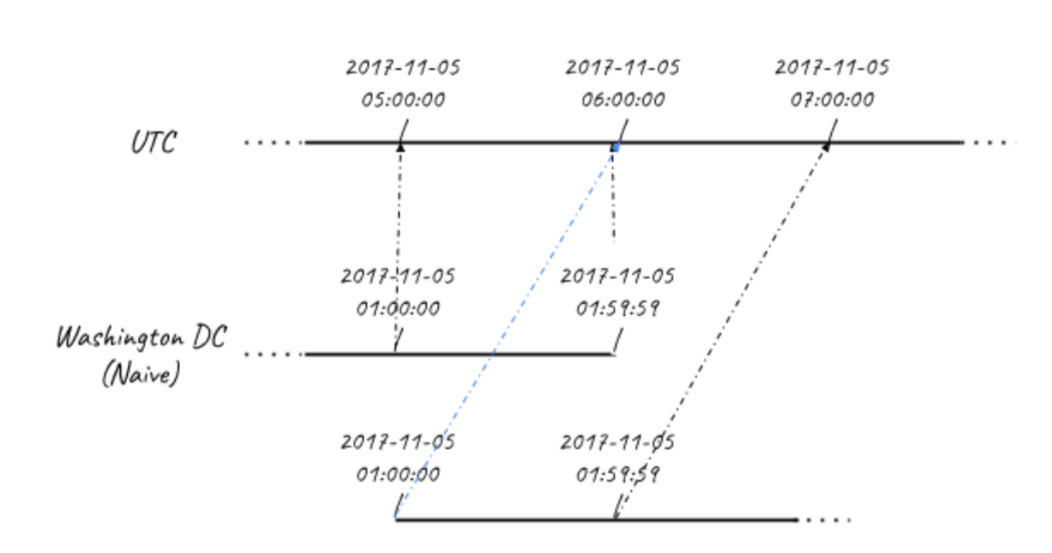

In [58]:
eastern = tz.gettz('US/Eastern')

# 2017-11-05 01:00:00
first_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo = eastern)
tz.datetime_ambiguous(first_1am) # This determines if this time could occur at two different UTC moments

True

In [61]:
# 2017-11-05 01:00:00 again
second_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo = eastern)
second_1am = tz.enfold(second_1am)
(first_1am - second_1am).total_seconds()

first_1am = first_1am.astimezone(tz.UTC)
second_1am = second_1am.astimezone(tz.UTC)
(second_1am - first_1am).total_seconds()

3600.0

### Reading Date and Time Data in Pandas

In [67]:
# Reading Date and Time Data in Pandas
import pandas as pd

# Loading data and datetimes with parse_dates
rides = pd.read_csv('Datasets/capital-onebike.csv', parse_dates=['Start date', 'End date'])
# OR
rides['Start date'] = pd.to_datetime(rides['Start date'], format = "%Y-%m-%d %H:%M:%S")
print(rides.head())


           Start date            End date  Start station number  \
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038   
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036   
2 2017-10-02 06:37:10 2017-10-02 06:42:53                 31036   
3 2017-10-02 08:56:45 2017-10-02 09:18:03                 31037   
4 2017-10-02 18:23:48 2017-10-02 18:45:05                 31295   

                          Start station  End station number  \
0                  Glebe Rd & 11th St N               31036   
1         George Mason Dr & Wilson Blvd               31036   
2         George Mason Dr & Wilson Blvd               31037   
3  Ballston Metro / N Stuart & 9th St N               31295   
4                     Potomac & M St NW               31230   

                            End station Bike number Member type  
0         George Mason Dr & Wilson Blvd      W20529      Member  
1         George Mason Dr & Wilson Blvd      W20529      Casual  
2  Ballston Metro / 

In [73]:
# Creating a new column Duration
rides['Duration'] = rides['End date'] - rides['Start date']
print(rides['Duration'].dt.total_seconds().head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


### Summarizing datetime data in Pandas

In [74]:
# Summarizing datetime data in Pandas

# Average time out of the dock(calculating summary statistics)
print(rides['Duration'].mean())
print(rides['Duration'].sum())
# Percent of time out of the dock
print(rides['Duration'].sum()/timedelta(days = 91))


0 days 00:19:38.931034482
3 days 22:58:10
0.04348417785917786


In [76]:
# Summarizing for non numeric columns
print(rides['Member type'].value_counts())
print(rides['Member type'].value_counts()/ len(rides))

Member type
Member    236
Casual     54
Name: count, dtype: int64
Member type
Member    0.813793
Casual    0.186207
Name: count, dtype: float64


C:\Users\meetb\AppData\Local\Temp\ipykernel_23360\2560037656.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rides.resample('M', on = 'Start date')['Duration Seconds'].mean().plot()


<Axes: xlabel='Start date'>

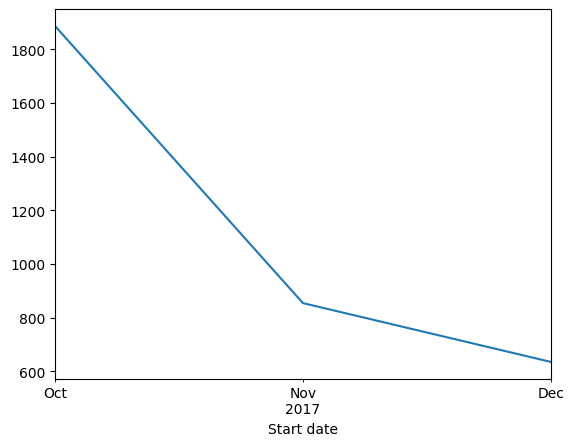

In [80]:
# Adding Duration in seconds column
rides['Duration Seconds'] = rides['Duration'].dt.total_seconds()

# Average Duration per member type
rides.groupby('Member type')['Duration Seconds'].mean()

# Plotting results
# M - resampling every month
# D - resampling every day
rides.resample('M', on = 'Start date')['Duration Seconds'].mean().plot()

### Additional Date time methods


In [83]:
# Timezones in Pandas
print(rides['Duration'].dt.total_seconds().min())   # Ride duration cannot be negative
# This occurs due to daylight savings
# Putting the first three rows in a time zone
rides['Start date'].head(3).dt.tz_localize('America/New_York')

# If we try to set the entire row to NY timezone, we get an ambiguous datetime error 
# Handling Ambiguous datetimes
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')
# Recalculating Durations
rides['Duration'] = rides['End date'] - rides['Start date']
print(rides['Duration'].dt.total_seconds().min()) 

-3346.0
116.0


In [85]:
# OTHER DATETIME OPERATIONS IN PANDAS
rides['Start date'].head().dt.year
# similar for month, day, etc

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Start date, dtype: int32

In [86]:
# See weekdays
rides['Start date'].head().dt.day_name()

0    Sunday
1    Sunday
2    Monday
3    Monday
4    Monday
Name: Start date, dtype: object

In [87]:
# Shifting the indexes forward one, padding with NaT

rides['End date'].shift(1).head()

0                         NaT
1   2017-10-01 15:26:26-04:00
2   2017-10-01 17:49:59-04:00
3   2017-10-02 06:42:53-04:00
4   2017-10-02 09:18:03-04:00
Name: End date, dtype: datetime64[ns, America/New_York]

: 